In [8]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import torchvision
from torchvision import transforms
import torchmetrics
from torchinfo import summary
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

# Internal libs
os.chdir("../")  # WARNING: changing dir every time cell is called
from scripts import data, model, engine, utils


MODEL_NAME = "Universal Resnet18 23_03_18 #1"
RANDOM_SEED = 100
NUM_WORKERS = os.cpu_count()

# hyperparameterse
NUM_BATCHES = 32
NUM_EPOCHS = 100
LEARNING_RATE = 0.001

TRAIN_DIR = Path("./data/train/")
DEV_DIR = Path("./data/dev/")
TEST_DIR = Path("./data/test/")

In [10]:
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = "mps"
else:
    device = "cpu"

In [11]:
# ------------------ Data ------------------
image_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

mask_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

class_map_path = TRAIN_DIR.parent / "defect_map.json"
train_data = data.SegmentationDataset(
                TRAIN_DIR,
                class_map_path,
                image_transform=image_transform,
                mask_transform=mask_transform,
            )

(
    train_dataloader,
    dev_dataloader,
    test_dataloader,
    class_names,
) = data.create_dataloaders(
    train_dir=TRAIN_DIR,
    dev_dir=DEV_DIR,
    test_dir=TEST_DIR,
    batch_size=NUM_BATCHES,
    image_transform=image_transform,
    mask_transform=mask_transform,
)
NUM_CLASSES = len(class_names)

In [12]:
image, mask = train_data.get_images(0)

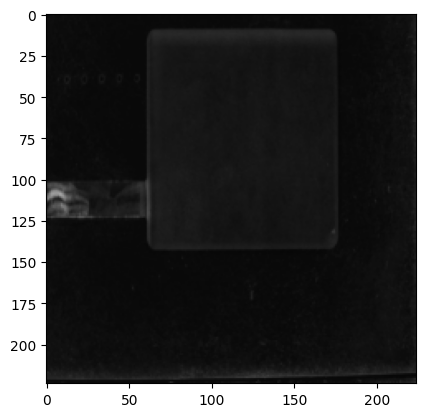

In [13]:
plt.imshow(image);

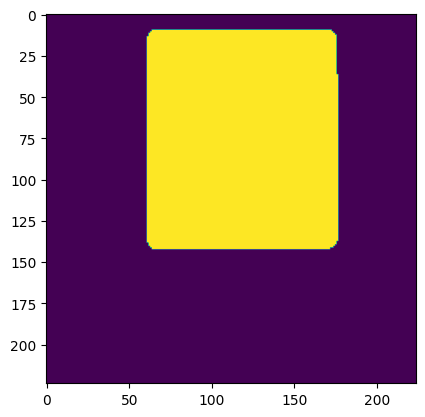

In [9]:
plt.imshow(mask);

In [ ]:
test = next(iter(train_dataloader))
# test = test[0][0].reshape((224, 224, 3))

In [ ]:
# ------------------ Model ------------------
# instantiate pretrained resnet18 model
model = model.resnet_model(n_resnet_layers="resnet18", pretrained=True, device=device)

# modify classifier layer for desired number of classes
old_num_features = model.fc.in_features
model.fc = nn.Linear(old_num_features, NUM_CLASSES)

model.to(device)

breakpoint()

torch.manual_seed = RANDOM_SEED

In [ ]:
# ------------------ Training ------------------
# define loss, optimizer, accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=LEARNING_RATE)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=NUM_CLASSES)

# # train model
# training_results = engine.train(
#     model,
#     train_dataloader,
#     dev_dataloader,
#     loss_fn,
#     optimizer,
#     accuracy_fn,
#     NUM_EPOCHS,
#     device,
# )

# # save model
# utils.save_model(model, MODEL_NAME)

# # save training results
# pd.DataFrame(training_results).to_csv(
#     Path(f"./models/{MODEL_NAME}/{MODEL_NAME}_training.csv"), index_label="epoch"
# )

In [1]:
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

In [5]:
model = DeepLabHead(2048, 1)

In [9]:
summary(model=model, input_size=(32, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "trainable"], col_width=20, row_settings=["var_names"])

AttributeError: module 'scripts.model' has no attribute 'parameters'